Info content theory subsection.

May ditch this unless it can be extended usefully? Should recon section be before this?

- 22/11/22 Basics in place. Needs work.
- For updates, see dev work http://jake:9966/lab/tree/code-share/jupyter-shared/PEMtk_dev_2022/basisSets/PEMtk_fitting_basis-set_demo_050621-full-revisit-Jake_040822.ipynb
- 15/02/23 revisiting and expanding...

(sec:info-content)= 
# Information content & sensitivity

A useful tool in considering the possibility of matrix element retrieval is the response, or sensitivity, of the experimental observables to the matrix elements of interest. Aspects of this have already been explored in {numref}`Sect. %s <sec:tensor-formulation>`, where consideration of the various geometric tensors (or geometric basis set) provided a route to investigating the coupling - hence sensitivity - of various parameters into product terms. In particular the tensor products discussed in {numref}`Sect. %s <sec:theory:tensor-products>`, including the full channel (response) functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ ({eq}`eq:channelFunc-MF-defn` and {eq}`eq:channelFunc-AF-defn`), can be used to examine the overall sensitivity of a given measurement to the underlying observables. By careful consideration of the problem at hand, experiments may then be tailored for particular cases based on these sensitivities. A related question, is how a given experimental sensitivity might be more readily quantified, and interpreted, for reconstruction problems, in a simpler manner. In general, this can be termed as the _information content_ of the measurement(s); an important aspect of such a metric is that it should be readily interpretable and, ideally, related to whether a reconstruction will be possible in a given case (this has, for example, been considered by other authors for specific cases, e.g. Refs. {cite}`Schmidtke2000,Ramakrishna2012`).
%, and ideally without too much theoretical study. 
Work in this direction is ongoing, and some thoughts are given below. In particular, the use of the observable $\beta_{L,M}$ presents an experimental route to (roughly) define a form of information content, whilst metrics derived from channel functions or density matrices may present a more rigorous theoretical route to a useful parameterization of information content.

## Numerical setup

This follows the setup in {numref}`Sect. %s <sec:tensor-formulation>` {ref}`sec:tensor-formulation`, using a symmetry-based set of basis functions for demonstration purposes. (Repeated code is hidden in PDF version.)

In [1]:
# Run default config - may need to set full path here
%run '../scripts/setup_notebook.py'

# Override plotters backend?
# plotBackend = 'pl'

*** Setting up notebook with standard Quantum Metrology Vol. 3 imports...
For more details see https://pemtk.readthedocs.io/en/latest/fitting/PEMtk_fitting_basic_demo_030621-full.html
To use local source code, pass the parent path to this script at run time, e.g. "setup_fit_demo ~/github"

*** Running: 2023-03-29 09:28:42
Working dir: /home/jovyan/QM3/doc-source/part1
Build env: notebook

* Loading packages...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


* sparse not found, sparse matrix forms not available. 
* natsort not found, some sorting functions not available. 
* Setting plotter defaults with epsproc.basicPlotters.setPlotters(). Run directly to modify, or change options in local env.
* Set Holoviews with bokeh.
* pyevtk not found, VTK export not available. 
***xyzpy not found, parallel functions not available.
* Set Holoviews with bokeh.
Jupyter Book      : 0.15.1
External ToC      : 0.3.1
MyST-Parser       : 0.18.1
MyST-NB           : 0.17.1
Sphinx Book Theme : 1.0.0
Jupyter-Cache     : 0.5.0
NbClient          : 0.5.4


In [2]:
# Setup symmetry-defined matrix elements using PEMtk

%run '../scripts/setup_symmetry_basis_tensors.py'

*** Setting up basis set for symmetry-defined matrix elements, see Quantum Metrology Vol. 3 Sect. 3.3...
Set symmetry=D2h, lmax=4
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim P
Added dim T
Added dim C
Remapped dims: {'C': 'Cont', 'mu': 'muX'}
Added dim Eke
Added dim Targ
Added dim Total
Added dim mu
Added dim it
Added dim Type
Product basis elements: dict_keys(['BLMtableResort', 'polProd', 'phaseConvention', 'BLMRenorm'])
Full basis elements: dict_keys(['QNs', 'EPRX', 'lambdaTerm', 'BLMtable', 'BLMtableResort', 'AFterm', 'AKQS', 'polProd', 'phaseConvention', 'BLMRenorm'])

*** Setting trial results for linear ramp ADMs.
Subselected from dataset 'ADM', dataType 'ADM': 50 from 50 points (100.00%)


In [3]:
%matplotlib inline
# May need this in some build envs.

(sec:expt-info-content)=
## Experimental information content

As discussed in {{ QM2 }}, the information content of a single observable might be regarded as simply the number of contributing $\beta_{L,M}$ parameters. In set notation:

$$M=\mathrm{n}\{\beta_{L,M}\}$$ (eq:BLM-set)

where $M$ is the information content of the measurement, defined as
$\mathrm{n}\{...\}$ the cardinality (number of elements) of the set of
contributing parameters. A set of measurements, made for some
experimental variable $u$, will then have a total information content:

$$M_{u}=\sum_{u}\mathrm{n}\{\beta_{L,M}^{u}\}$$

In the case where a single measurement contains multiple $\beta_{L,M}$,
e.g. as a function of energy $\epsilon$ or time $t$, the information
content will naturally be larger:

$$\begin{aligned}
M_{u,\epsilon,t} & = & \sum_{u,\epsilon,t}\mathrm{n}\{\beta_{L,M}^{u}(\epsilon,t)\}\\
 & = & M_{u}\times M_{\epsilon,t}\end{aligned}$$

where the second line pertains if each measurement has the same native
information content, independent of $u$. It may be that the variable $k$
is continuous (e.g. photoelectron energy), but in practice it will
usually be discretized in some fashion by the measurement.

In terms of purely experimental methodologies, a larger $M_{u}$ clearly
defines a richer experimental measurement which explores more of the
total measurement space spanned by the full set of
$\{\beta_{L,M}^{u}(k,t)\}$. However, in this basic definition a larger
$M_{u}$ does not necessarily indicate a higher information content for
quantum retrieval applications. The reason for this is simply down to
the complexity of the problem (cf. Eq. {eq}`eqn:channel-fns`), in which many couplings define the sensitivity of the observable to the underlying system properties of
interest. In this sense, more measurements, and larger $M$, may only add
redundancy, rather than new information.

From a set of numerical results, it is relatively trivial to investigate some of these properties as a function of various constraints, using standard Python functionality, as shown in the code blocks below. For example, $M$ can be determined numerically as the number of elements in the dataset, the number of _unique_ elements, the number of elements within a certain range or above a threshold, and so on.

% These make use of the demo cases (defined by symmetry) as previously defined.

In [4]:
# For the basic case, the data (Xarray object) can be queried, and relevant dimensions investigated

print(f"Available dimensions: {BetaNorm.dims}")

# Show BLM dimension details from Xarray dataset
display(BetaNorm.BLM)

Available dimensions: ('Labels', 't', 'Type', 'it', 'Eke', 'BLM')


<xarray.DataArray 'BLM' (BLM: 9)>
array([(0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1), (2, -1), (2, 0),
       (2, 1)], dtype=object)
Coordinates:
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 0 0 0 1 1 1 2 2 2
  - m        (BLM) int64 -1 0 1 -1 0 1 -1 0 1

In [5]:
# Note, however, that the indexes may not always be physical, depending on how the data has been composed and cleaned up.
# For example, the above has l=0, m=+/-1 cases, which are non-physical.

# Clean array to remove terms |m|>l, and display
# BetaNorm.BLM.where(np.abs(BetaNorm.BLM.m)<=BetaNorm.BLM.l,drop=True)
# BetaNorm.where(np.abs(BetaNorm.m)<=BetaNorm.l,drop=True)

cleanBLMs(BetaNorm).BLM

<xarray.DataArray 'BLM' (BLM: 7)>
array([(0, 0), (1, -1), (1, 0), (1, 1), (2, -1), (2, 0), (2, 1)], dtype=object)
Coordinates:
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 0 1 1 1 2 2 2
  - m        (BLM) int64 0 -1 0 1 -1 0 1

In [6]:
# Thresholding can also be used to reduce the results
ep.matEleSelector(BetaNorm, thres=1e-4).BLM

<xarray.DataArray 'BLM' (BLM: 2)>
array([(0, 0), (2, 0)], dtype=object)
Coordinates:
  * BLM      (BLM) MultiIndex
  - l        (BLM) int64 0 2
  - m        (BLM) int64 0 0

In [34]:
# The index can be returned as a Pandas object, and statistical routines applied...
# For example, nunique() will provide the number of unique values.

thres=1e-4

print(f"Original array M={BetaNorm.BLM.indexes['BLM'].nunique()}")
# print(f"Cleaned array M={BetaNorm.BLM.where(np.abs(BetaNorm.BLM.m)<=BetaNorm.BLM.l,drop=True).size}")
print(f"Cleaned array M={cleanBLMs(BetaNorm).BLM.size}")
print(f"Thresholded array (thres={thres}), M={ep.matEleSelector(BetaNorm, thres=thres).BLM.indexes['BLM'].nunique()}")

Original array M=9
Cleaned array M=7
Thresholded array (thres=0.0001), M=2


In [8]:
# PD stats from multi-index... 
# Note this is not particularly useful for coords only
BetaNorm.BLM.indexes['BLM'].to_frame().describe()

,l,m
count,9.000,9.000
mean,1.000,0.000
std,0.866,0.866
min,0.000,-1.000
25%,0.000,-1.000
50%,1.000,0.000
75%,2.000,1.000
max,2.000,1.000


In [9]:
# Convert full dataset to PD dataframe and describe.
BetaNormPD,_ = ep.util.multiDimXrToPD(BetaNorm.squeeze().real, thres=None, colDims='t', dropna=False)   #colDims={'BLM':['l','m']})  #, squeeze=True)
BetaNormPD.describe().to_frame()

,0
count,9.000
mean,0.086
std,0.176
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,0.470


For more complicated cases, with $u>1$, e.g. time-dependent measurements, interrogating the statistics of the observables may also be an interesting avenue to explore. The examples below investigate this for the example "linear ramp" {{ ADMs }} case. Here the statistical analysis is, potentially, a measure of the useful/non-redundant information content, for instance the range or variance in a particular observable can be analysed, as can the number of unique values and so forth.

In [10]:
# Convert to PD and tabulate with epsproc functionality
# Note restack along 't' dimension
BetaNormLinearADMsPD, _ = ep.util.multiDimXrToPD(BetaNormLinearADMs.squeeze().real, thres=1e-4, colDims='t')

# Basic describe with Pandas, see https://pandas.pydata.org/docs/user_guide/basics.html#summarizing-data-describe
# This will give properties per t
BetaNormLinearADMsPD.describe()   #([pd.unique])   #(['nunique'])

t,0,1,2,3,4,5,6,7,8,9
count,2.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000
mean,0.389,0.190,0.225,0.259,0.294,0.328,0.363,0.397,0.432,0.466
std,0.115,0.242,0.265,0.290,0.315,0.341,0.368,0.395,0.423,0.451
min,0.308,0.001,0.002,0.003,0.004,0.006,0.007,0.008,0.009,0.010
25%,0.348,0.009,0.017,0.026,0.035,0.043,0.052,0.060,0.069,0.078
50%,0.389,0.041,0.083,0.124,0.166,0.207,0.249,0.290,0.332,0.373
75%,0.430,0.382,0.457,0.532,0.607,0.681,0.751,0.797,0.844,0.891
max,0.470,0.517,0.564,0.610,0.657,0.704,0.756,0.831,0.906,0.980


In [11]:
# Basic describe with Pandas, see https://pandas.pydata.org/docs/user_guide/basics.html#summarizing-data-describe
# By transposing the input array, this will give properties per BLM
BetaNormLinearADMsPD.T.describe()

l,0,2,4,6,8
m,0,0,0,0,0
count,10.000,10.000,9.000,9.000,9.000
mean,0.680,0.644,0.207,0.043,0.006
std,0.141,0.226,0.114,0.024,0.003
min,0.470,0.308,0.041,0.009,0.001
25%,0.575,0.476,0.124,0.026,0.003
50%,0.680,0.644,0.207,0.043,0.006
75%,0.786,0.812,0.290,0.060,0.008
max,0.891,0.980,0.373,0.078,0.010


For further insight and control, specific aggregation functions and criteria can be specified. For instance, it may be interesting to look at the number of unique values to a certain precision (e.g. depending on experimental uncertainties), or consider deviation of values from the mean.

In [12]:
# Round values to 1 d.p., then apply statistical methods
BetaNormLinearADMsPD.round(1).agg(['min','max','var','count','nunique'])

t,0,1,2,3,4,5,6,7,8,9
min,0.30,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
max,0.50,0.500,0.600,0.600,0.70,0.700,0.800,0.800,0.900,1.000
var,0.02,0.062,0.083,0.083,0.11,0.127,0.152,0.145,0.167,0.207
count,2.00,5.000,5.000,5.000,5.00,5.000,5.000,5.000,5.000,5.000
nunique,2.00,3.000,4.000,4.000,4.00,3.000,4.000,4.000,5.000,5.000


In [13]:
# Define demean function and apply (from https://stackoverflow.com/a/26110278)
demean = lambda x: x - x.mean()

# Compute differences from mean
BetaNormLinearADMsPD.transform(demean,axis='columns')  #.round(1).agg(['min','max','var','count','nunique'])   # OK, matches above case.

,t,0,1,2,3,4,5,6,7,8,9
l,m,,,,,,,,,,
0,0,-0.210,-0.164,-0.117,-0.070,-0.023,2.336e-02,0.070,0.117,0.164,0.210
2,0,-0.336,-0.262,-0.187,-0.112,-0.037,3.736e-02,0.112,0.187,0.262,0.336
4,0,NaN,-0.166,-0.124,-0.083,-0.041,0.000e+00,0.041,0.083,0.124,0.166
6,0,NaN,-0.035,-0.026,-0.017,-0.009,0.000e+00,0.009,0.017,0.026,0.035
8,0,NaN,-0.004,-0.003,-0.002,-0.001,-8.674e-19,0.001,0.002,0.003,0.004


In [14]:
# Apply statistical functions to differences from mean.
BetaNormLinearADMsPD.transform(demean,axis='columns').round(1).agg(['min','max','var','count','nunique'])

t,0,1,2,3,4,5,6,7,8,9
min,-0.300,-0.300,-0.200,-0.100,-0.0,-0.0,0.000,0.000,0.000,0.000
max,-0.200,-0.000,-0.000,-0.000,-0.0,-0.0,0.100,0.200,0.300,0.300
var,0.005,0.018,0.007,0.003,0.0,0.0,0.003,0.007,0.017,0.018
count,2.000,5.000,5.000,5.000,5.0,5.0,5.000,5.000,5.000,5.000
nunique,2.000,3.000,3.000,2.000,1.0,1.0,2.000,3.000,4.000,3.000


In this case the analysis suggests that $t=4,5$ contain minimal, and redundant, information, whilst $t=0,3,6$ are also of low total information content. However, this analysis is not necessarily absolutely definitive, since some nuances may be lost in this basic statistical analysis, particularly for weaker channels.

For a more detailed analysis, other standard analysis tools can be deployed. For instance, the covariance matrix can be investigated, given by $K_{i,j}=\textrm{cov}[X_{i},X_{j}]=\langle(X_{i}-\langle X_{i}\rangle)(X_{j}-\langle X_{j}\rangle)\rangle$. For the linear ramp case this analysis is not particularly useful, but will become more informative for more complicated cases.

In [30]:
# import pandas as pd
# import holoviews as hv
# import hvplot.pandas
# hv.extension('bokeh')

# Compute covariance matrix with Pandas
# Note this is the pairwise covariance of the columns, 
# see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html
covMat = BetaNormLinearADMsPD.cov()
# covMat.name = "Covariance"
# Plot with holoviews
# hv.HeatMap(covMat, kdims='t')
# import hvplot.pandas
figObj = covMat.hvplot.heatmap(cmap='viridis')

# hvds = hv.Dataset(daPlot)
# hvmap = hvds.to(hv.HeatMap, kdims=kdims)

# Import routines for density calculation and plotting - FAILS, needs da with specific props
# from epsproc.calc import density
# density.matPlot(covMat)

In [31]:
# Glue figure
glue("covMatBLMExample", figObj)   #covMat.hvplot.heatmap(cmap='viridis'))

:HeatMap   [columns,index]   (value)

```{glue:figure} covMatBLMExample
---
name: "fig-covMatBLMExample"
---
Example $\beta_\{L,M\}(t)$ covariance matrix, see text for details.
```

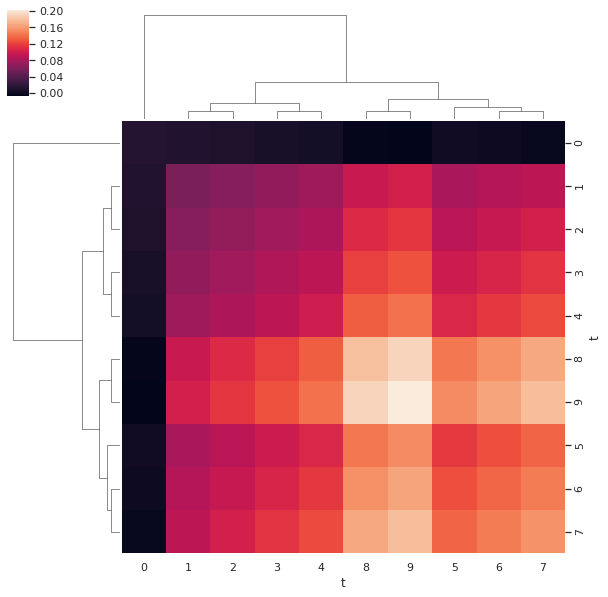

In [17]:
# Seaborn also has nice cluster plotting routines, which include sorting by similarity
import seaborn as sns
sns.clustermap(covMat)

In [18]:
covMat

t,0,1,2,3,4,5,6,7,8,9
t,,,,,,,,,,
0,1.319e-02,0.011,0.009,0.006,0.004,0.002,-4.514e-04,-0.003,-0.005,-0.007
1,1.092e-02,0.059,0.064,0.069,0.075,0.080,8.575e-02,0.091,0.097,0.102
2,8.645e-03,0.064,0.070,0.077,0.083,0.089,9.567e-02,0.102,0.108,0.115
3,6.371e-03,0.069,0.077,0.084,0.091,0.098,1.056e-01,0.113,0.120,0.127
4,4.097e-03,0.075,0.083,0.091,0.099,0.107,1.155e-01,0.124,0.132,0.140
5,1.823e-03,0.080,0.089,0.098,0.107,0.116,1.254e-01,0.134,0.143,0.153
6,-4.514e-04,0.086,0.096,0.106,0.116,0.125,1.354e-01,0.145,0.155,0.165
7,-2.726e-03,0.091,0.102,0.113,0.124,0.134,1.453e-01,0.156,0.167,0.178
8,-5.000e-03,0.097,0.108,0.120,0.132,0.143,1.552e-01,0.167,0.179,0.190


**Following are as above but for (L,M) dimension)**

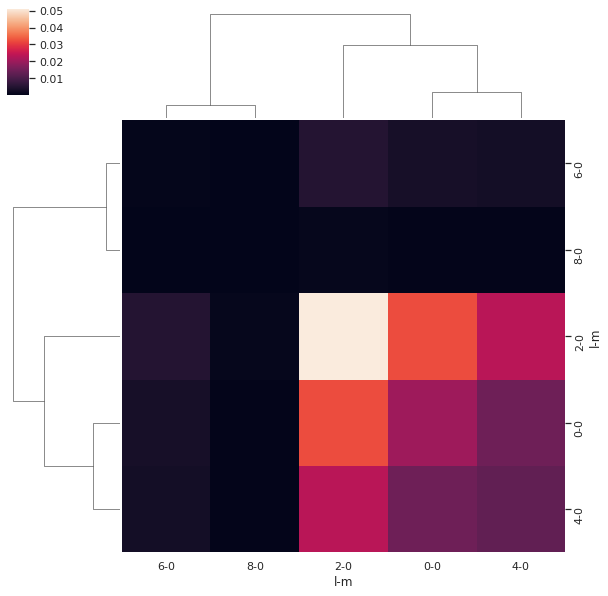

In [19]:
import seaborn as sns
sns.clustermap(BetaNormLinearADMsPD.T.cov().fillna(0))

In [20]:
BetaNormLinearADMsPD.transform(demean,axis='columns').round(1).T.agg(['min','max','var','count','nunique'])

l,0,2,4,6,8
m,0,0,0,0,0
min,-0.200,-0.300,-0.200,0.0,0.0
max,0.200,0.300,0.200,0.0,0.0
var,0.022,0.051,0.015,0.0,0.0
count,10.000,10.000,9.000,9.0,9.0
nunique,5.000,7.000,5.000,1.0,1.0


In [21]:
BetaNormLinearADMsPD

,t,0,1,2,3,4,5,6,7,8,9
l,m,,,,,,,,,,
0,0,0.470,0.517,0.564,0.610,0.657,0.704,0.751,0.797,0.844,0.891
2,0,0.308,0.382,0.457,0.532,0.607,0.681,0.756,0.831,0.906,0.980
4,0,NaN,0.041,0.083,0.124,0.166,0.207,0.249,0.290,0.332,0.373
6,0,NaN,0.009,0.017,0.026,0.035,0.043,0.052,0.060,0.069,0.078
8,0,NaN,0.001,0.002,0.003,0.004,0.006,0.007,0.008,0.009,0.010


In [22]:
BetaNormLinearADMsPD.mean(axis='columns')

l  m
0  0    0.680
2  0    0.644
4  0    0.207
6  0    0.043
8  0    0.006
dtype: float64

**BELOW VERY ROUGH - check old dev notebook for better...**

In [23]:
# Examine unique values at a given level of difference/rounding
# pd.cut(BetaNormLinearADMsPD, 10)

# Use cut - not very useful here, maybe better with agg?
testCut = BetaNormLinearADMsPD.apply(pd.cut, args=[10])
testCut
# testCut.agg('count')
# testCut.agg('unique')

,t,0,1,2,3,4,5,6,7,8,9
l,m,,,,,,,,,,
0,0,"(0.454, 0.47]","(0.465, 0.517]","(0.507, 0.564]","(0.55, 0.61]","(0.592, 0.657]","(0.634, 0.704]","(0.681, 0.756]","(0.748, 0.831]","(0.816, 0.906]","(0.883, 0.98]"
2,0,"(0.308, 0.324]","(0.362, 0.414]","(0.451, 0.507]","(0.489, 0.55]","(0.592, 0.657]","(0.634, 0.704]","(0.681, 0.756]","(0.748, 0.831]","(0.816, 0.906]","(0.883, 0.98]"
4,0,NaN,"(0.000594, 0.0527]","(0.0584, 0.114]","(0.064, 0.125]","(0.135, 0.2]","(0.145, 0.215]","(0.231, 0.306]","(0.255, 0.337]","(0.278, 0.368]","(0.301, 0.398]"
6,0,NaN,"(0.000594, 0.0527]","(0.00166, 0.0584]","(0.00272, 0.064]","(0.00379, 0.0697]","(0.00485, 0.0754]","(0.00591, 0.0816]","(0.00695, 0.0901]","(0.00798, 0.0985]","(0.00902, 0.107]"
8,0,NaN,"(0.000594, 0.0527]","(0.00166, 0.0584]","(0.00272, 0.064]","(0.00379, 0.0697]","(0.00485, 0.0754]","(0.00591, 0.0816]","(0.00695, 0.0901]","(0.00798, 0.0985]","(0.00902, 0.107]"


In [24]:
BetaNormLinearADMsPD

,t,0,1,2,3,4,5,6,7,8,9
l,m,,,,,,,,,,
0,0,0.470,0.517,0.564,0.610,0.657,0.704,0.751,0.797,0.844,0.891
2,0,0.308,0.382,0.457,0.532,0.607,0.681,0.756,0.831,0.906,0.980
4,0,NaN,0.041,0.083,0.124,0.166,0.207,0.249,0.290,0.332,0.373
6,0,NaN,0.009,0.017,0.026,0.035,0.043,0.052,0.060,0.069,0.078
8,0,NaN,0.001,0.002,0.003,0.004,0.006,0.007,0.008,0.009,0.010


In [25]:
# BetaNormLinearADMs

# Convert/tabulate - NOTE SQUEEZE NOT WORKING for multiDimXrToPD here...?
# testBasisPD, testBasisRS = ep.util.multiDimXrToPD(BetaNormLinearADMs, thres=1e-4, colDims='t', squeeze=True)
testBasisPD, testBasisRS = ep.util.multiDimXrToPD(BetaNormLinearADMs.squeeze().real, thres=1e-4, colDims='t', squeeze=True)

# Basic describe - see pemtk functionality? Only set for fit results?
# testBasisPD.T.agg('count')
testBasisPD.T.describe()   #([pd.unique])   #(['nunique'])

l,0,2,4,6,8
m,0,0,0,0,0
count,10.000,10.000,9.000,9.000,9.000
mean,0.680,0.644,0.207,0.043,0.006
std,0.141,0.226,0.114,0.024,0.003
min,0.470,0.308,0.041,0.009,0.001
25%,0.575,0.476,0.124,0.026,0.003
50%,0.680,0.644,0.207,0.043,0.006
75%,0.786,0.812,0.290,0.060,0.008
max,0.891,0.980,0.373,0.078,0.010


In [26]:
testBasisPD.round(1).agg(['min','max','var','count','nunique'])

t,0,1,2,3,4,5,6,7,8,9
min,0.30,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000
max,0.50,0.500,0.600,0.600,0.70,0.700,0.800,0.800,0.900,1.000
var,0.02,0.062,0.083,0.083,0.11,0.127,0.152,0.145,0.167,0.207
count,2.00,5.000,5.000,5.000,5.00,5.000,5.000,5.000,5.000,5.000
nunique,2.00,3.000,4.000,4.000,4.00,3.000,4.000,4.000,5.000,5.000


In [27]:
testBasisPD.T.nunique()

l  m
0  0    10
2  0    10
4  0     9
6  0     9
8  0     9
dtype: int64

In [28]:
# BetaNormX.BLM.indexes['BLM']  #.unqiue()
# pd.unique(BetaNormX.BLM.indexes['BLM'])
# dir(BetaNormX.BLM.indexes['BLM'])   #.agg('count')

BetaNorm = BetaNormX

# 
BetaNorm.BLM

# A basic 
BetaNorm.BLM.indexes['BLM'].nunique()

9

In [29]:
BetaNormX

<xarray.DataArray (Labels: 1, t: 1, Type: 1, it: 1, Eke: 1, BLM: 9)>
array([[[[[[0.        +0.j, 0.47015799+0.j, 0.        +0.j,
            0.        +0.j, 0.        +0.j, 0.        +0.j,
            0.        +0.j, 0.30771995+0.j, 0.        +0.j]]]]]])
Coordinates:
    Euler       (Labels) object (0.0, 0.0, 0.0)
  * Labels      (Labels) <U1 'A'
  * t           (t) int64 0
  * Type        (Type) <U1 'U'
  * it          (it) int64 0
  * Eke         (Eke) int64 0
    XSraw       (Labels, t, Type, it, Eke) complex128 (0.47015798628979705+0j)
    XSrescaled  (Labels, t, Type, it, Eke) complex128 (1.666666666666667+0j)
    XSiso       (Type, it, Eke) complex128 (8.33333333333333+0j)
  * BLM         (BLM) MultiIndex
  - l           (BLM) int64 0 0 0 1 1 1 2 2 2
  - m           (BLM) int64 -1 0 1 -1 0 1 -1 0 1
Attributes:
    dataType:         BLM
    name:             Symmetrized harmonics
    PG:               D2h
    lmax:             4
    QNs:              None
    AKQS:             None
    EPRX:             None
    p:                [0]
    BLMtable:         None
    BLMtableResort:   None
    lambdaTerm:       None
    polProd:          None
    AFterm:           None
    thres:            None
    thresDims:        Eke
    selDims:          {}
    sqThres:          False
    dropThres:        True
    sumDims:          ['mu', 'mup', 'l', 'lp', 'm', 'mp', 'S-Rp']
    sumDimsPol:       ['P', 'R', 'Rp', 'p']
    symSum:           True
    degenDrop:        True
    SFflag:           False
    SFflagRenorm:     False
    BLMRenorm:        0
    squeeze:          False
    phaseConvention:  E
    basisReturn:      ProductBasis
    verbose:          0
    kwargs:           {'RX': None}
    matEleSelector:   <function matEleSelector at 0x7f299542caf0>
    degenDict:        {'it': <xarray.DataArray 'it' (it: 1)>\narray([0])\nCoo...

## Information content from channel functions

A more complete accounting of information content would, therefore, also
include the channel couplings, i.e. sensitivity/dependence of the
observable to a given system property, in some manner. For the case of a
time-dependent measurement, arising from a rotational wavepacket, this
can be written as:

$$M_{u}=\mathrm{n}\{\varUpsilon_{L,M}^{u}(\epsilon,t)\}$$

In this case, each $(\epsilon,t)$ is treated as an independent
measurement with unique information content, although there may be
redundancy as a function of $t$ depending on the nature of the
rotational wavepacket and channel functions.
% - this is explored further in Sect. [\[sec:bootstrapping-info-sensitivity\]](#sec:bootstrapping-info-sensitivity){reference-type="ref" reference="sec:bootstrapping-info-sensitivity"}. 
(Note this is in
distinction to previously demonstrated cases where the time-dependence
was created from a shaped laser-field, and was integrated over in the
measurements, which provided a coherently-multiplexed case, see refs.
{cite}`hockett2014CompletePhotoionizationExperiments,hockett2015CompletePhotoionizationExperiments,hockett2015CoherentControlPhotoelectron` for details.)

In the numerical examples below, this is considered in terms of the full channel (response) functions $\varUpsilon_{L,M}^{u,\zeta\zeta'}$ as defined in {eq}`eq:channelFunc-MF-defn` and {eq}`eq:channelFunc-AF-defn` (see {numref}`Sect. %s <sec:theory:tensor-products>`). Numerically, the routines follow from those already introduced above for exploring the information content of $\beta_{L,M}$ terms, with the caveat that there are more dimensions to handle in the channel functions, indexed by the relevant set of quantum numbers $\{\zeta,\zeta'\}$ - these can be included in the criteria for determination of $M$, or selected or summed over as desired.

% Numerical example...

In [112]:
# Define a set of channel functions to test
channelFuncs = (basisProductLinearADMs['BLMtableResort'] * basisProductLinearADMs['polProd'])

# For illustrative purposes, define a subset to use for analysis
channelFuncsSubset = channelFuncs.sel(Labels='A').sel({'S-Rp':0,'mu':0,'mup':0})  #.sel(L=2)

# Check dimensions
print(f"Available dimensions: {channelFuncs.dims}")
print(f"Subset dimensions: {channelFuncsSubset.dims}")

Available dimensions: ('m', 'mp', 'S-Rp', 'l', 'lp', 'L', 'mu', 'mup', 'Labels', 'M', 't')
Subset dimensions: ('m', 'mp', 'l', 'lp', 'L', 'M', 't')


````{margin}
```{note}
Full tabulations of the parameters available in HTML or notebook formats only.
```
````

In [110]:
# Convert to PD and tabulate with epsproc functionality
# Note restack along 't' dimension
channelFuncsSubsetPD, _ = ep.util.multiDimXrToPD(channelFuncsSubset.squeeze().real, thres=1e-4, colDims='t')

# Basic describe with Pandas, see https://pandas.pydata.org/docs/user_guide/basics.html#summarizing-data-describe
# This will give properties per t
# channelFuncsSubsetPD.describe()   #([pd.unique])   #(['nunique'])

# Round values to 1 d.p., then apply statistical methods
# channelFuncsSubsetPD.round(1).agg(['min','max','var','count','nunique'])  # Compute per t

channelFuncsSubsetPD.T.round(2).agg(['min','max','var','count','nunique']).T  #[0:100]  # Compute per basis index and display


# Plotting tests with hvplot wrapper - interesting, but lacking fine control so far...
# channelFuncsSubsetPD.T.round(1).agg(['min','max','var','count','nunique']).T.hvplot.hist('nunique', by=['L','M'], subplots=True).cols(1)
# channelFuncsSubsetPD.T.round(3).agg(['min','max','var','count','nunique']).T.hvplot.hist('nunique', by=['l','lp'])
# channelFuncsSubsetPD.T.round(3).agg(['min','max','var','count','nunique']).T.hvplot.hist('nunique', by=['l','lp'], subplots=True).cols(2)
# channelFuncsSubsetPD.T.round(2).agg(['min','max','var','count','nunique']).T.hvplot.hist('nunique', by=['L','l','lp'], subplots=True)
# channelFuncsSubsetPD.T.round(2).agg(['min','max','var','count','nunique']).T.hvplot.heatmap(x='nunique',y='L', by=['L','l','lp'], subplots=True)

# Holomap version - not working in notebook currently? Gives controls, but plot not responding...
# channelFuncsSubsetPD.T.round(2).agg(['min','max','var','count','nunique']).T.hvplot.hist('nunique', by=['L','l','lp'], groupby=['L','l','lp'])

min  max    var  count  nunique
L M l lp m  mp                                 
0 0 0 0   0  0  0.1  0.2  0.003   10.0      2.0
    1 1  -1  1  0.1  0.2  0.003   10.0      2.0
          0  0  0.1  0.2  0.003   10.0      2.0
          1 -1  0.1  0.2  0.003   10.0      2.0
    2 2  -2  2  0.1  0.2  0.003   10.0      2.0
         -1  1  0.1  0.2  0.003   10.0      2.0
          0  0  0.1  0.2  0.003   10.0      2.0
          1 -1  0.1  0.2  0.003   10.0      2.0
          2 -2  0.1  0.2  0.003   10.0      2.0
    3 3  -3  3  0.1  0.2  0.003   10.0      2.0
         -2  2  0.1  0.2  0.003   10.0      2.0
         -1  1  0.1  0.2  0.003   10.0      2.0
          0  0  0.1  0.2  0.003   10.0      2.0
          1 -1  0.1  0.2  0.003   10.0      2.0
          2 -2  0.1  0.2  0.003   10.0      2.0
          3 -3  0.1  0.2  0.003   10.0      2.0
    4 4  -4  4  0.1  0.2  0.003   10.0      2.0
         -3  3  0.1  0.2  0.003   10.0      2.0
         -2  2  0.1  0.2  0.003   10.0      2.0
         -1  1  0.1  0.2  0.003   10.0      2.0
          0  0  0.1  0.2  0.003   10.0      2.0
          1 -1  0.1  0.2  0.003   10.0      2.0
          2 -2  0.1  0.2  0.003   10.0      2.0
          3 -3  0.1  0.2  0.003   10.0      2.0
          4 -4  0.1  0.2  0.003   10.0      2.0
2 0 0 2   0  0  0.0  0.1  0.002   10.0      2.0
    1 1  -1  1 -0.1 -0.0  0.001   10.0      2.0
          0  0  0.0  0.1  0.002   10.0      2.0
          1 -1 -0.1 -0.0  0.001   10.0      2.0
      3  -1  1  0.0  0.1  0.003   10.0      2.0
          0  0  0.0  0.1  0.002   10.0      2.0
          1 -1  0.0  0.1  0.003   10.0      2.0
    2 0   0  0  0.0  0.1  0.002   10.0      2.0
      2  -2  2 -0.1 -0.0  0.003   10.0      2.0
         -1  1  0.0  0.0  0.000   10.0      1.0
          0  0  0.0  0.1  0.003   10.0      2.0
          1 -1  0.0  0.0  0.000   10.0      1.0
          2 -2 -0.1 -0.0  0.003   10.0      2.0
      4  -2  2  0.0  0.1  0.003   10.0      2.0
         -1  1  0.0  0.1  0.002   10.0      2.0
          0  0  0.0  0.1  0.002   10.0      2.0
          1 -1  0.0  0.1  0.002   10.0      2.0
          2 -2  0.0  0.1  0.003   10.0      2.0
    3 1  -1  1  0.0  0.1  0.003   10.0      2.0
          0  0  0.0  0.1  0.002   10.0      2.0
          1 -1  0.0  0.1  0.003   10.0      2.0
      3  -3  3 -0.1 -0.0  0.003   10.0      2.0
         -1  1  0.0  0.1  0.001   10.0      2.0
          0  0  0.0  0.1  0.003   10.0      2.0
          1 -1  0.0  0.1  0.001   10.0      2.0
          3 -3 -0.1 -0.0  0.003   10.0      2.0
    4 2  -2  2  0.0  0.1  0.003   10.0      2.0
         -1  1  0.0  0.1  0.002   10.0      2.0
          0  0  0.0  0.1  0.002   10.0      2.0
          1 -1  0.0  0.1  0.002   10.0      2.0
          2 -2  0.0  0.1  0.003   10.0      2.0
      4  -4  4 -0.1 -0.0  0.002   10.0      2.0
         -3  3 -0.0 -0.0  0.000   10.0      1.0
         -2  2  0.0  0.0  0.000   10.0      1.0
         -1  1  0.0  0.1  0.002   10.0      2.0
          0  0  0.0  0.1  0.003   10.0      2.0
          1 -1  0.0  0.1  0.002   10.0      2.0
          2 -2  0.0  0.0  0.000   10.0      1.0
          3 -3 -0.0 -0.0  0.000   10.0      1.0
          4 -4 -0.1 -0.0  0.002   10.0      2.0
4 0 0 4   0  0  0.0  0.1  0.001    9.0      2.0
    1 3  -1  1 -0.0 -0.0  0.000    9.0      1.0
          0  0  0.0  0.0  0.000    9.0      1.0
          1 -1 -0.0 -0.0  0.000    9.0      1.0
    2 2  -2  2  0.0  0.0  0.000    9.0      1.0
         -1  1 -0.0 -0.0  0.000    9.0      1.0
          0  0  0.0  0.0  0.000    9.0      1.0
          1 -1 -0.0 -0.0  0.000    9.0      1.0
          2 -2  0.0  0.0  0.000    9.0      1.0
      4  -2  2 -0.0 -0.0  0.000    9.0      1.0
         -1  1  0.0  0.0  0.000    9.0      1.0
          0  0  0.0  0.0  0.000    9.0      1.0
          1 -1  0.0  0.0  0.000    9.0      1.0
          2 -2 -0.0 -0.0  0.000    9.0      1.0
    3 1  -1  1 -0.0 -0.0  0.000    9.0      1.0
          0  0  0.0  0.0  0.000    9.0      1.0
          1 -1 -0.0 -0.0  0.000 

For the higher-dimensional case, it is useful to plot terms relative to all quantum numbers. For example, in a similar manner to the basis set explorations of {numref}`Sect. %s <sec:theory:tensor-products>`, related properties such as the distance from the mean can be examined with `lmPlot()`. And, as previously demonstrated, other properties, such as the covariance, may be examined and plotted.

Set dataType (No dataType)
Plotting data (No filename), pType=a, thres=0.01, with Seaborn


No handles with labels found to put in legend.


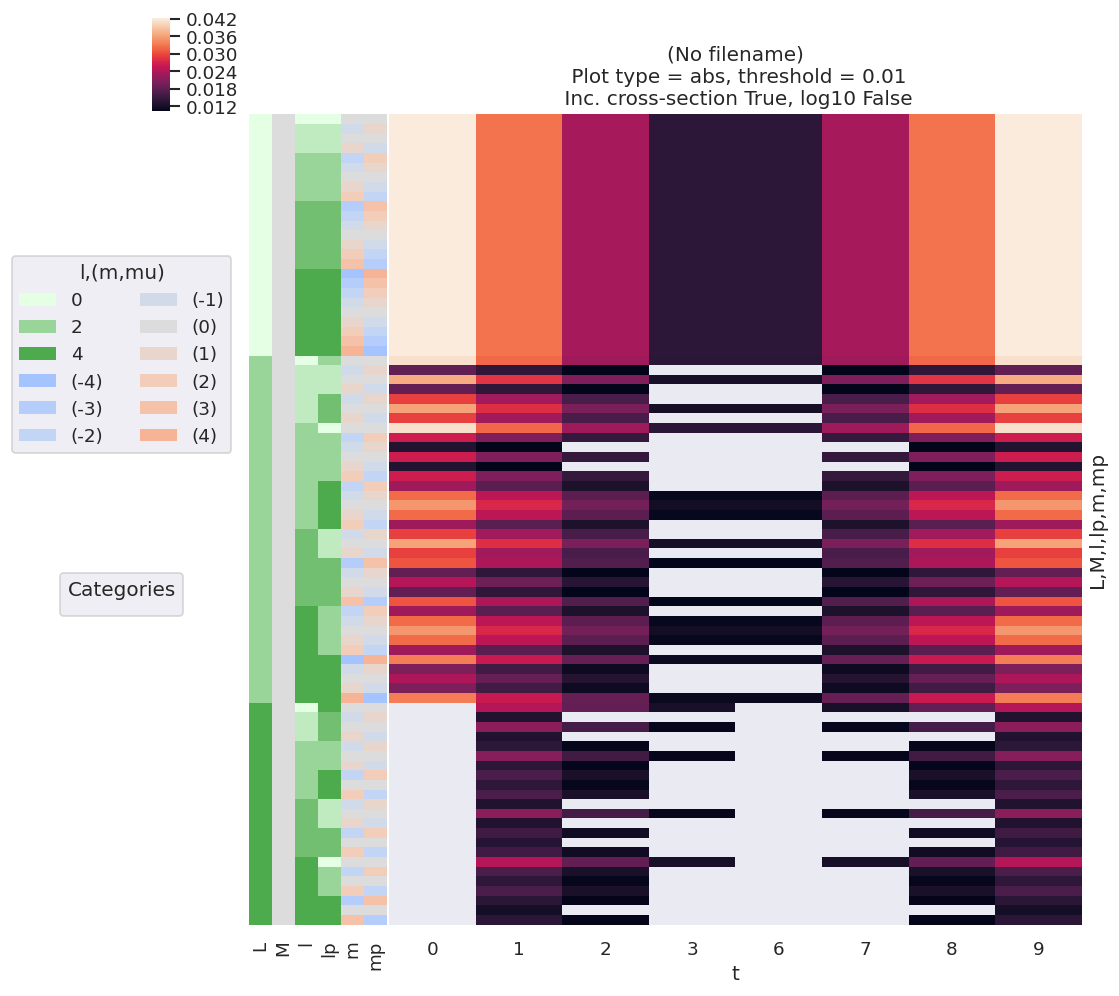

In [82]:
# channelFuncsSubsetPD.transform(demean,axis='columns') 
# cmap=None   # cmap = None for default. 'vlag' good?
# cmap = 'vlag'

# De-meaned channel functions
channelFuncsDemean = channelFuncsSubsetPD.transform(demean,axis='columns')

# Plot using lmPlot routine - note this requires conversion to Xarray data type first.
daPlot, daPlotpd, legendList, gFig =  ep.lmPlot(channelFuncsDemean.to_xarray().to_array('t')
                                                , xDim='t', cmap=cmap, mDimLabel='m'); 

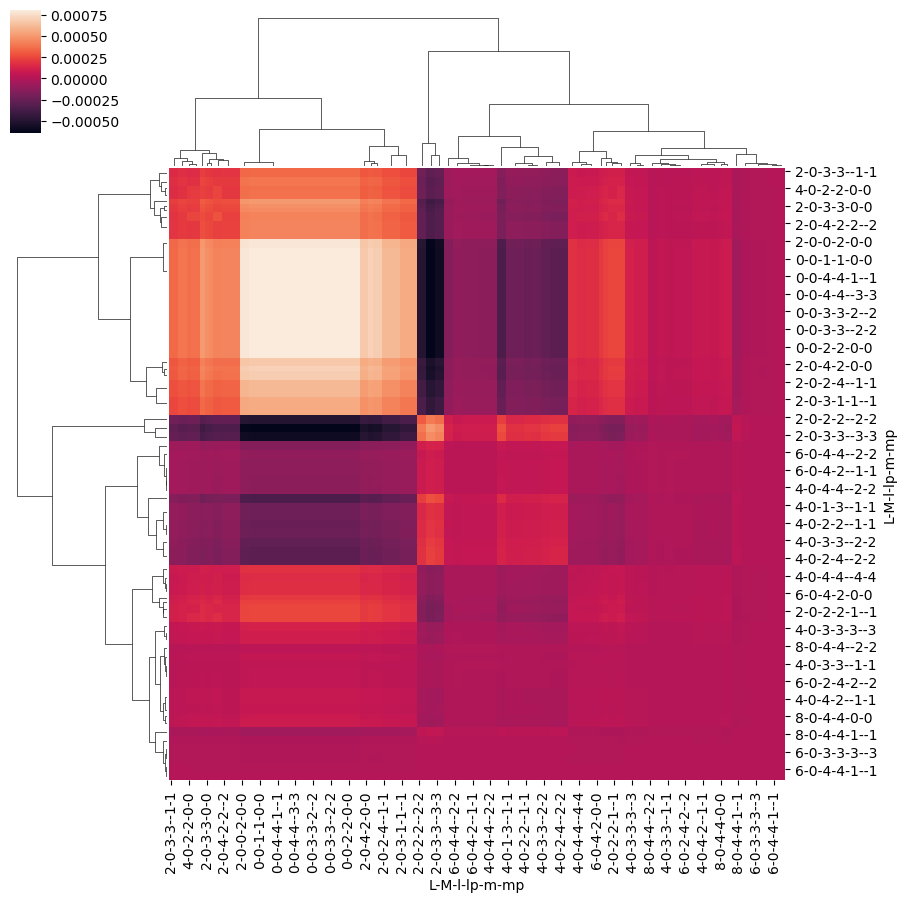

In [111]:
# Full covariance mapping along all dims
sns.clustermap(channelFuncsSubsetPD.T.cov().fillna(0))

In [47]:
channelFuncsSubsetPD

t                          0          1          2          3          4  \
L M l lp m  mp mu mup                                                      
0 0 0 0   0  0 -1  1   0.094  8.936e-02  8.469e-02  8.001e-02  7.534e-02   
                0  0   0.094  1.034e-01  1.127e-01  1.221e-01  1.314e-01   
                1 -1   0.094  8.936e-02  8.469e-02  8.001e-02  7.534e-02   
    1 1  -1  1 -1  1   0.094  8.936e-02  8.469e-02  8.001e-02  7.534e-02   
                0  0   0.094  1.034e-01  1.127e-01  1.221e-01  1.314e-01   
...                      ...        ...        ...        ...        ...   
8 0 4 4   2 -2 -1  1     NaN        NaN        NaN        NaN  1.229e-04   
                0  0     NaN  4.440e-04  8.880e-04  1.332e-03  1.776e-03   
                1 -1     NaN        NaN        NaN        NaN  1.229e-04   
          3 -3  0  0     NaN -1.269e-04 -2.537e-04 -3.806e-04 -5.074e-04   
          4 -4  0  0     NaN        NaN        NaN        NaN        NaN   

t                              5          6          7          8          9  
L M l lp m  mp mu mup                                                         
0 0 0 0   0  0 -1  1   7.067e-02  6.600e-02  6.132e-02  5.665e-02  5.198e-02  
                0  0   1.408e-01  1.501e-01  1.594e-01  1.688e-01  1.781e-01  
                1 -1   7.067e-02  6.600e-02  6.132e-02  5.665e-02  5.198e-02  
    1 1  -1  1 -1  1   7.067e-02  6.600e-02  6.132e-02  5.665e-02  5.198e-02  
                0  0   1.408e-01  1.501e-01  1.594e-01  1.688e-01  1.781e-01  
...                          ...        ...        ...        ...        ...  
8 0 4 4   2 -2 -1  1   1.536e-04  1.843e-04  2.150e-04  2.457e-04  2.765e-04  
                0  0   2.220e-03  2.664e-03  3.108e-03  3.552e-03  3.996e-03  
                1 -1   1.536e-04  1.843e-04  2.150e-04  2.457e-04  2.765e-04  
          3 -3  0  0  -6.343e-04 -7.611e-04 -8.880e-04 -1.015e-03 -1.142e-03  
          4 -4  0  0         NaN        NaN  1.110e-04  1.269e-04  1.427e-04  

[401 rows x 10 columns]

In [81]:
channelFuncsSubsetPD.transform(demean,axis='columns').to_xarray().to_array('t')

<xarray.DataArray (t: 10, L: 5, M: 1, l: 5, lp: 5, m: 9, mp: 9)>
array([[[[[[[            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            ...,
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan]],

           [[            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
...
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan],
            [            nan,             nan,             nan, ...,
                         nan,             nan,             nan]],

           [[            nan,             nan,             nan, ...,
                         nan,             nan,  1.58567161e-05],
            [            nan,             nan,             nan, ...,
                         nan, -5.07414916e-04,             nan],
            [            nan,             nan,             nan, ...,
              1.77595221e-03,             nan,             nan],
            ...,
            [            nan,             nan,  1.77595221e-03, ...,
                         nan,             nan,             nan],
            [            nan, -5.07414916e-04,             nan, ...,
                         nan,             nan,             nan],
            [ 1.58567161e-05,             nan,             nan, ...,
                         nan,             nan,             nan]]]]]]])
Coordinates:
  * L        (L) int64 0 2 4 6 8
  * M        (M) int64 0
  * l        (l) int64 0 1 2 3 4
  * lp       (lp) int64 0 1 2 3 4
  * m        (m) int64 -4 -3 -2 -1 0 1 2 3 4
  * mp       (mp) int64 -4 -3 -2 -1 0 1 2 3 4
  * t        (t) int64 0 1 2 3 4 5 6 7 8 9

## Information content from density matrices